In [10]:
# „Ç§„É≥„Çπ„Éà„Éº„É´ÔºàColab„ÇÑJupyter„ÅßÂÆüË°å„Åô„ÇãÂ†¥ÂêàÔºâ
%pip install pytrends

import pandas as pd
import time
from datetime import datetime
from pytrends.request import TrendReq

# pytrends„ÅÆÂàùÊúüÂåñÔºàÊó•Êú¨Ë™û„ÄÅJSTÔºâ
pytrends = TrendReq(hl='ja-JP', tz=540)

# ÂèñÂæó„Åó„Åü„ÅÑ„Ç≠„Éº„ÉØ„Éº„ÉâÔºà‰æãÔºöÂè§ÁùÄ„Å´Èñ¢ÈÄ£„Åó„Åü„Éñ„É©„É≥„Éâ„Éª„Ç´„ÉÜ„Ç¥„É™„ÉªÊµÅË°åË™û„Å™„Å©Ôºâ
keywords = [
    'Âè§ÁùÄ „Çª„Éº„Çø„Éº',
    'Âè§ÁùÄ „ÉÄ„Ç¶„É≥',
    'Âè§ÁùÄ MA-1',
    'Levi\'s',
    'Y2K „Éï„Ç°„ÉÉ„Ç∑„Éß„É≥'
]

# „Éà„É¨„É≥„Éâ„ÅÆÂèñÂæóÊúüÈñìÔºà2021Âπ¥„Åã„Çâ‰ªäÊó•„Åæ„ÅßÔºâ
today = datetime.today().strftime('%Y-%m-%d')
timeframe = f'2021-01-01 {today}'

# „Éà„É¨„É≥„Éâ„Éá„Éº„Çø„Çí‰øùÂ≠ò„Åô„ÇãDataFrame
trend_df = pd.DataFrame()

# „É™„Éà„É©„Ç§Ê©üËÉΩ‰ªò„ÅçÈñ¢Êï∞
def get_interest_over_time_with_retry(pytrends, retries=5, sleep_time=60):
    for i in range(retries):
        try:
            data = pytrends.interest_over_time()
            return data
        except Exception as e:
            print(f"[{i+1}/{retries}] „Ç®„É©„ÉºÁô∫Áîü: {e}")
            print(f"{sleep_time}ÁßíÂæÖÊ©ü„Åó„Å¶ÂÜçË©¶Ë°å„Åó„Åæ„Åô...")
            time.sleep(sleep_time)
    raise Exception("interest_over_time „ÅÆÂèñÂæó„Å´Â§±Êïó„Åó„Åæ„Åó„Åü„ÄÇ")

# „Ç≠„Éº„ÉØ„Éº„Éâ„Åî„Å®„Å´1„Å§„Åö„Å§„Éà„É¨„É≥„Éâ„ÇíÂèñÂæó
for kw in keywords:
    print(f"„ÄêÂèñÂæó‰∏≠„Äë{kw}")
    try:
        pytrends.build_payload([kw], cat=0, timeframe=timeframe, geo='JP')
        time.sleep(10)  # „Ç¢„ÇØ„Çª„ÇπÈñìÈöî„Çí„ÅÇ„Åë„ÇãÔºà429ÂõûÈÅøÔºâ

        data = get_interest_over_time_with_retry(pytrends)

        # „Éà„É¨„É≥„Éâ„Éá„Éº„ÇøÂèñÂæóÂæå„ÅÆÂá¶ÁêÜ
        if data is not None and not data.empty:
            # „Ç´„É©„É†Âêç„ÇíÂÆâÂÖ®„Å´Â§âÊèõ
            safe_col_name = kw.replace(" ", "_").replace("'", "")
            df = data.reset_index()[['date', kw]]
            df = df.rename(columns={kw: f"trend_{safe_col_name}"})

            # Êó•‰ªò„ÅßÁµêÂêà
            if trend_df.empty:
                trend_df = df
            else:
                trend_df = pd.merge(trend_df, df, on='date', how='outer')
    except Exception as e:
        print(f"‚ùå {kw} „ÅÆÂèñÂæó„Å´Â§±Êïó: {e}")

# Ê¨†ÊêçÂÄ§„Çí0„ÅßË£úÂÆåÔºà„Åæ„Åü„ÅØÈÅ©ÂÆúÂá¶ÁêÜÔºâ
trend_df = trend_df.fillna(0)

# ÁµêÊûú„ÅÆË°®Á§∫ÔºàÂøÖË¶Å„Å™„ÇâCSV‰øùÂ≠ò„ÇÇÔºâ
print(trend_df.head())

# CSV„Å®„Åó„Å¶‰øùÂ≠ò„Åó„Åü„ÅÑÂ†¥ÂêàÔºà‰ªªÊÑèÔºâ
# trend_df.to_csv('google_trends_features.csv', index=False)


Note: you may need to restart the kernel to use updated packages.
„ÄêÂèñÂæó‰∏≠„ÄëÂè§ÁùÄ „Çª„Éº„Çø„Éº
[1/5] „Ç®„É©„ÉºÁô∫Áîü: The request failed: Google returned a response with code 429
60ÁßíÂæÖÊ©ü„Åó„Å¶ÂÜçË©¶Ë°å„Åó„Åæ„Åô...


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


„ÄêÂèñÂæó‰∏≠„ÄëÂè§ÁùÄ „ÉÄ„Ç¶„É≥


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


„ÄêÂèñÂæó‰∏≠„ÄëÂè§ÁùÄ MA-1


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


„ÄêÂèñÂæó‰∏≠„ÄëLevi's
[1/5] „Ç®„É©„ÉºÁô∫Áîü: The request failed: Google returned a response with code 429
60ÁßíÂæÖÊ©ü„Åó„Å¶ÂÜçË©¶Ë°å„Åó„Åæ„Åô...


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


„ÄêÂèñÂæó‰∏≠„ÄëY2K „Éï„Ç°„ÉÉ„Ç∑„Éß„É≥
        date  trend_Âè§ÁùÄ_„Çª„Éº„Çø„Éº  trend_Âè§ÁùÄ_„ÉÄ„Ç¶„É≥  trend_Âè§ÁùÄ_MA-1  trend_Levis  \
0 2020-12-27             78            69              0           51   
1 2021-01-03              0            55              0           52   
2 2021-01-10             40            51              0           59   
3 2021-01-17             51            47              0           77   
4 2021-01-24             42            30              0           78   

   trend_Y2K_„Éï„Ç°„ÉÉ„Ç∑„Éß„É≥  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Font file not found at /usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf. Using default font.


/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}

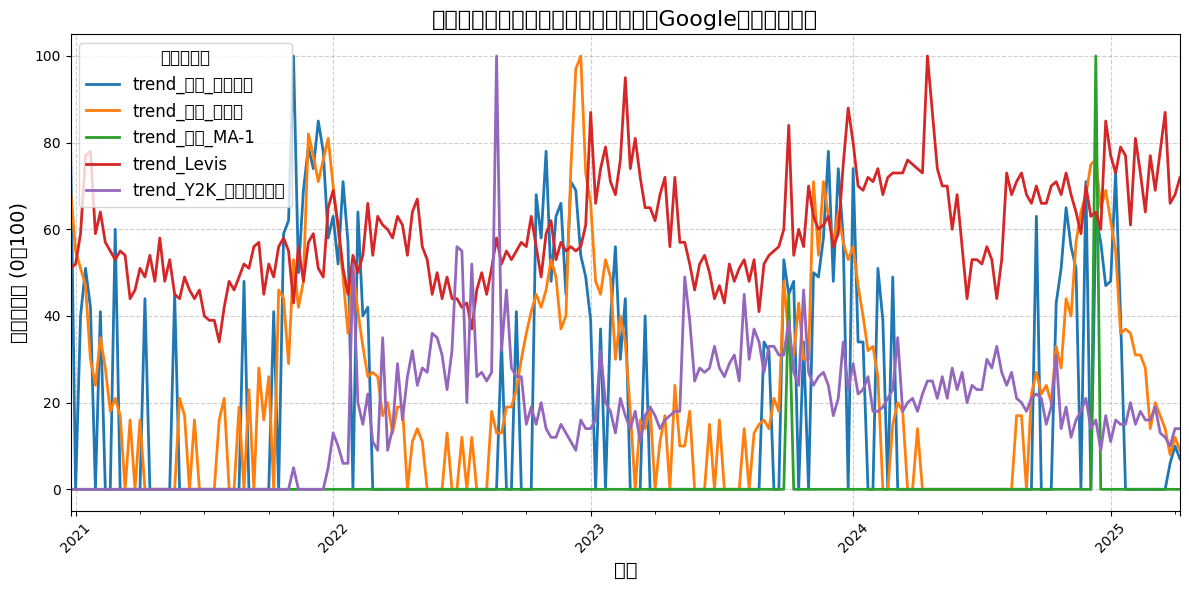

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# „Éï„Ç©„É≥„Éà„Éï„Ç°„Ç§„É´„ÅÆ„Éë„ÇπÔºàÁí∞Â¢É„Å´Âêà„Çè„Åõ„Å¶Ë™øÊï¥Ôºâ
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

try:
    # „Éï„Ç©„É≥„Éà„ÇíÁôªÈå≤
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
except FileNotFoundError:
    print(f"Font file not found at {font_path}. Using default font.")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# trend_df „Çí„Éó„É≠„ÉÉ„ÉàÂØæË±°„ÅÆ DataFrame „Å´Ë®≠ÂÆö
data = trend_df.copy()
data.set_index("date", inplace=True)

# „Éó„É≠„ÉÉ„Éà
data.plot(figsize=(12, 6), linewidth=2)
plt.title("„Éï„Ç°„ÉÉ„Ç∑„Éß„É≥„ÉªÂè§ÁùÄÈñ¢ÈÄ£„Ç≠„Éº„ÉØ„Éº„Éâ„ÅÆGoogleÊ§úÁ¥¢„Éà„É¨„É≥„Éâ", fontsize=16)
plt.xlabel("Êó•‰ªò", fontsize=14)
plt.ylabel("Ê§úÁ¥¢Èñ¢ÂøÉÂ∫¶ (0„Äú100)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="„Ç≠„Éº„ÉØ„Éº„Éâ", fontsize=12, title_fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

‚ùå Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì„ÄÇ„Éá„Éï„Ç©„É´„Éà„Éï„Ç©„É≥„Éà„Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ
„ÄêÂèñÂæó‰∏≠„ÄëÂè§ÁùÄ „Çª„Éº„Çø„Éº


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


„ÄêÂèñÂæó‰∏≠„ÄëÂè§ÁùÄ „ÉÄ„Ç¶„É≥


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


„ÄêÂèñÂæó‰∏≠„ÄëÂè§ÁùÄ MA-1


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


„ÄêÂèñÂæó‰∏≠„ÄëLevi's


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


„ÄêÂèñÂæó‰∏≠„ÄëY2K „Éï„Ç°„ÉÉ„Ç∑„Éß„É≥


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/tmp/ipykernel_2119/3355960535.py:106: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/3355960535.py:106: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/3355960535.py:106: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/3355960535.py:106: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/3355960535.py:106: 

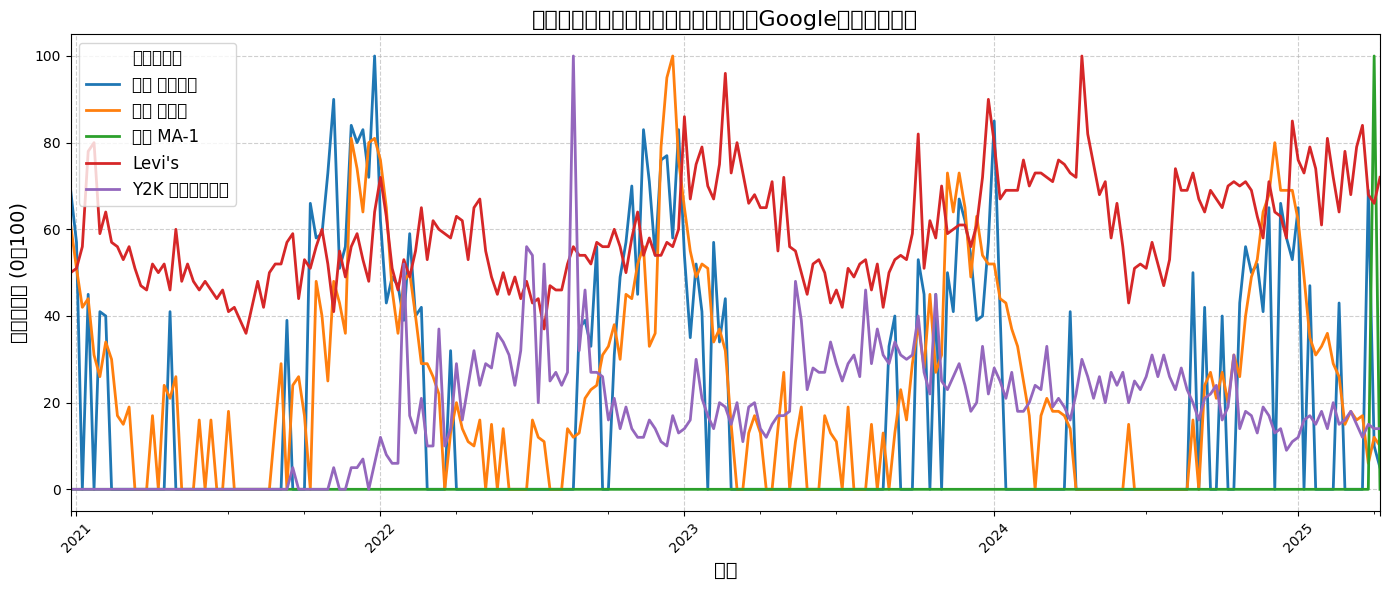

In [15]:
import pandas as pd
import time
from datetime import datetime
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# ‚ñº „Éï„Ç©„É≥„ÉàË®≠ÂÆöÔºàÊó•Êú¨Ë™ûÂØæÂøú„Éï„Ç©„É≥„Éà„ÇíÊòéÁ§∫ÁöÑ„Å´Ë®≠ÂÆöÔºâ
font_path = '/usr/share/fonts/truetype/ipafont/ipagp.ttf'  # IPA„Ç¥„Ç∑„ÉÉ„ÇØÔºàapt„Åß„Ç§„É≥„Çπ„Éà„Éº„É´ÂèØËÉΩÔºâ

if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
else:
    print("‚ùå Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì„ÄÇ„Éá„Éï„Ç©„É´„Éà„Éï„Ç©„É≥„Éà„Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# ‚ñº Google„Éà„É¨„É≥„ÉâË®≠ÂÆö
pytrends = TrendReq(hl='ja-JP', tz=540)

keywords = [
    'Âè§ÁùÄ „Çª„Éº„Çø„Éº',
    'Âè§ÁùÄ „ÉÄ„Ç¶„É≥',
    'Âè§ÁùÄ MA-1',
    'Levi\'s',
    'Y2K „Éï„Ç°„ÉÉ„Ç∑„Éß„É≥'
]

# ÂàóÂêç„Éû„ÉÉ„Éî„É≥„Ç∞
keyword_map = {
    'Âè§ÁùÄ „Çª„Éº„Çø„Éº': 'furugi_sweater',
    'Âè§ÁùÄ „ÉÄ„Ç¶„É≥': 'furugi_down',
    'Âè§ÁùÄ MA-1': 'furugi_ma1',
    "Levi's": 'levis',
    'Y2K „Éï„Ç°„ÉÉ„Ç∑„Éß„É≥': 'y2k_fashion'
}

label_map = {
    'trend_furugi_sweater': 'Âè§ÁùÄ „Çª„Éº„Çø„Éº',
    'trend_furugi_down': 'Âè§ÁùÄ „ÉÄ„Ç¶„É≥',
    'trend_furugi_ma1': 'Âè§ÁùÄ MA-1',
    'trend_levis': "Levi's",
    'trend_y2k_fashion': 'Y2K „Éï„Ç°„ÉÉ„Ç∑„Éß„É≥'
}

# ‚ñº ÊúüÈñìË®≠ÂÆö
today = datetime.today().strftime('%Y-%m-%d')
timeframe = f'2021-01-01 {today}'

# ‚ñº „É™„Éà„É©„Ç§‰ªò„ÅçÂèñÂæóÈñ¢Êï∞
def get_interest_over_time_with_retry(pytrends, retries=5, sleep_time=60):
    for i in range(retries):
        try:
            data = pytrends.interest_over_time()
            return data
        except Exception as e:
            print(f"[{i+1}/{retries}] „Ç®„É©„ÉºÁô∫Áîü: {e}")
            time.sleep(sleep_time)
    raise Exception("interest_over_time „ÅÆÂèñÂæó„Å´Â§±Êïó„Åó„Åæ„Åó„Åü„ÄÇ")

# ‚ñº „Éà„É¨„É≥„Éâ„Éá„Éº„ÇøÂèéÈõÜ
trend_df = pd.DataFrame()

for kw in keywords:
    print(f"„ÄêÂèñÂæó‰∏≠„Äë{kw}")
    try:
        pytrends.build_payload([kw], cat=0, timeframe=timeframe, geo='JP')
        time.sleep(10)  # APIÂà∂ÈôêÂØæÁ≠ñ

        data = get_interest_over_time_with_retry(pytrends)

        if data is not None and not data.empty:
            safe_col_name = keyword_map.get(kw, kw.replace(" ", "_").replace("'", ""))
            df = data.reset_index()[['date', kw]]
            df = df.rename(columns={kw: f"trend_{safe_col_name}"})

            if trend_df.empty:
                trend_df = df
            else:
                trend_df = pd.merge(trend_df, df, on='date', how='outer')

    except Exception as e:
        print(f"‚ùå {kw} „ÅÆÂèñÂæó„Å´Â§±Êïó: {e}")

# Ê¨†Êêç„ÇíË£úÂÆå
trend_df = trend_df.fillna(0)

# ‚ñº „Ç∞„É©„ÉïÊèèÁîª
data = trend_df.copy()
data.set_index("date", inplace=True)

ax = data.plot(figsize=(14, 6), linewidth=2)
for line, label in zip(ax.lines, data.columns):
    line.set_label(label_map.get(label, label))

plt.title("„Éï„Ç°„ÉÉ„Ç∑„Éß„É≥„ÉªÂè§ÁùÄÈñ¢ÈÄ£„Ç≠„Éº„ÉØ„Éº„Éâ„ÅÆGoogleÊ§úÁ¥¢„Éà„É¨„É≥„Éâ", fontsize=16)
plt.xlabel("Êó•‰ªò", fontsize=14)
plt.ylabel("Ê§úÁ¥¢Èñ¢ÂøÉÂ∫¶ (0„Äú100)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="„Ç≠„Éº„ÉØ„Éº„Éâ", fontsize=12, title_fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ‚ñº ÂøÖË¶Å„Å™„ÇâCSV‰øùÂ≠òÔºà‰ªªÊÑèÔºâ
trend_df.to_csv('google_trends_features.csv', index=False, encoding='utf-8-sig')


In [ ]:
from pytrends.request import TrendReq
from datetime import datetime, timedelta
import pandas as pd
import time
import os

# ‚ñº Ë®≠ÂÆö
pytrends = TrendReq(hl='ja-JP', tz=540)
keywords = [
    'Âè§ÁùÄ „Çª„Éº„Çø„Éº',
    'Âè§ÁùÄ „ÉÄ„Ç¶„É≥',
    'Âè§ÁùÄ MA-1',
    "Levi's",
    'Y2K „Éï„Ç°„ÉÉ„Ç∑„Éß„É≥'
]
keyword_map = {
    'Âè§ÁùÄ „Çª„Éº„Çø„Éº': 'furugi_sweater',
    'Âè§ÁùÄ „ÉÄ„Ç¶„É≥': 'furugi_down',
    'Âè§ÁùÄ MA-1': 'furugi_ma1',
    "Levi's": 'levis',
    'Y2K „Éï„Ç°„ÉÉ„Ç∑„Éß„É≥': 'y2k_fashion'
}

# ‚ñº Ë£úÊ≠£‰ªò„ÅçÂèñÂæóÈñ¢Êï∞Ôºà„É™„Éà„É©„Ç§‰ªò„ÅçÔºâ
def get_corrected_trend(pytrends, kw, start_date, end_date, retries=3, step_days=89):
    current_start = start_date
    segments = []

    while current_start < end_date:
        for attempt in range(retries):
            try:
                current_end = min(current_start + timedelta(days=step_days), end_date)
                timeframe = f"{current_start.strftime('%Y-%m-%d')} {current_end.strftime('%Y-%m-%d')}"
                pytrends.build_payload([kw], cat=0, timeframe=timeframe, geo='JP')
                data = pytrends.interest_over_time().reset_index()
                if not data.empty:
                    segments.append(data[['date', kw]])
                time.sleep(2)  # Âøµ„ÅÆ„Åü„ÇÅËªΩ„Åè‰ºë„ÇÄ
                break
            except Exception as e:
                print(f"[{kw}] „É™„ÇØ„Ç®„Çπ„ÉàÂ§±Êïó: {e}")
                wait_time = 60 * (attempt + 1)
                print(f"{wait_time}ÁßíÂæÖ„Å£„Å¶„É™„Éà„É©„Ç§„Åó„Åæ„Åô...")
                time.sleep(wait_time)
        current_start = current_end - timedelta(days=1)

    if not segments:
        raise Exception(f"[{kw}] „Éá„Éº„Çø„ÅåÂèñÂæó„Åß„Åç„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")

    # Ë£úÊ≠£Âá¶ÁêÜ
    base = segments[0].copy()
    merged = base.copy()
    for i in range(1, len(segments)):
        prev = merged
        curr = segments[i]

        overlap = pd.merge(prev, curr, on='date', suffixes=('_prev', '_curr'))
        if not overlap.empty:
            prev_val = overlap[f'{kw}_prev'].iloc[0]
            curr_val = overlap[f'{kw}_curr'].iloc[0]
            scale = prev_val / curr_val if curr_val != 0 else 1.0
        else:
            scale = 1.0

        curr[kw] = curr[kw] * scale
        curr = curr[~curr['date'].isin(prev['date'])]
        merged = pd.concat([merged, curr], ignore_index=True)

    return merged

# ‚ñº ÂÆüË°åÔºö2021Âπ¥„Äú‰ªäÊó•„Åæ„Åß
start_date = datetime(2021, 1, 1)
end_date = datetime.today()

output_dir = "trends_output"
os.makedirs(output_dir, exist_ok=True)

for kw in keywords:
    safe_col = keyword_map[kw]
    out_path = os.path.join(output_dir, f"trend_{safe_col}.csv")
    if os.path.exists(out_path):
        print(f"‚úÖ {kw}Ôºà{safe_col}Ôºâ„ÅØÊó¢„Å´ÂèñÂæóÊ∏à„Åø„ÄÇ„Çπ„Ç≠„ÉÉ„Éó„ÄÇ")
        continue

    print(f"üîç ÂèñÂæó‰∏≠: {kw}")
    try:
        df = get_corrected_trend(pytrends, kw, start_date, end_date)
        df = df.rename(columns={kw: f"trend_{safe_col}"})
        df.to_csv(out_path, index=False, encoding='utf-8-sig')
        print(f"‚úÖ {kw} „Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü ‚Üí {out_path}")
    except Exception as e:
        print(f"‚ùå {kw} „ÅÆÂèñÂæó„Å´Â§±Êïó„Åó„Åæ„Åó„Åü: {e}")

    
    print("‚è≥ Ê¨°„ÅÆ„É™„ÇØ„Ç®„Çπ„Éà„Åæ„Åß90ÁßíÂæÖÊ©ü...\n")
    time.sleep(90)
